##### ARTI 560 - Computer Vision  
## Image Classification using Convolutional Neural Networks (CNNs) - Exercise 

### Objective

In this exercise, you will:

1. **Load the Fashion MNIST dataset** from the [Keras dataset](https://keras.io/api/datasets/) website.
2. **Preprocess the data** for training.
3. **Build your own CNN architecture** and evaluate the model.

In [5]:
pip install matplotlib tensorflow numpy

  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
  Using cached absl_py-2.4.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Number of unique classes
num_classes = len(np.unique(y_train))
print(f"Number of classes: {num_classes}")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step 
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of classes: 10


In [7]:
# Define class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

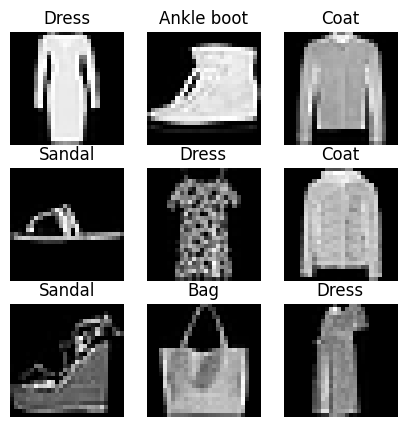

In [8]:
# Plot a 3x3 grid of random images from the dataset with their labels
plt.figure(figsize=(5, 5))
for i in range(9):
    index = np.random.randint(0, len(x_train))
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(class_names[y_train[index]])
    plt.axis("off")
plt.show()

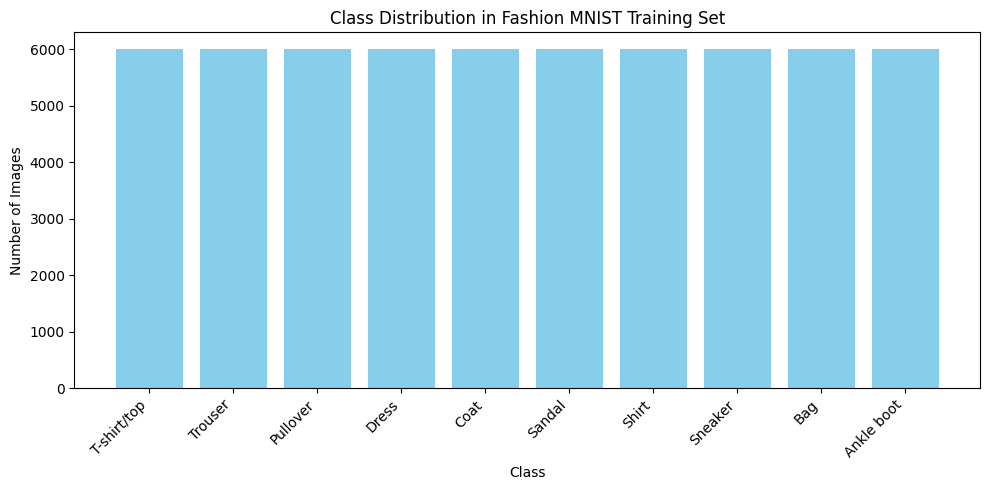

In [9]:
# Count occurrences of each class in the training set
class_counts = np.bincount(y_train.flatten())

# Plot the class distribution
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts, color='skyblue')
plt.title("Class Distribution in Fashion MNIST Training Set")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Build your Image Classification Model
Note: Don't use one hot encoding and use sparse_categorical_crossentropy for loss

In [10]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Normalize pixel values for x_train and x_test
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to add channel dimension (28, 28) -> (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Note: Don't use one-hot encoding - use sparse labels directly

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes in Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {accuracy}')

c:\Users\lenovo\Desktop\Alhnouf-lab1\cv_lab\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8281 - loss: 0.4729 - val_accuracy: 0.8600 - val_loss: 0.3864
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8849 - loss: 0.3166 - val_accuracy: 0.8830 - val_loss: 0.3210
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8998 - loss: 0.2740 - val_accuracy: 0.8949 - val_loss: 0.2916
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9115 - loss: 0.2406 - val_accuracy: 0.8970 - val_loss: 0.2763
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9201 - loss: 0.2169 - val_accuracy: 0.9030 - val_loss: 0.2677
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9294 - loss: 0.1919 - val_accuracy: 0.9087 - val_loss: 0.2539
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9354 - loss: 0.1752 - val_accuracy: 0.9109 - val_loss: 0.2520
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9421 - loss: 0.1555 - val_accuracy: 0.